# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [449]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [450]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [451]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [452]:
eji = pd.read_csv('EJI_2024_United_States.csv')

In [453]:
eji.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag
0,1,1,20804,140000US01001020804,1001020804,1001020804,Autauga County,Alabama,AL,Census Tract 208.04; Autauga County; Alabama,5497,765,4677,0.1984,0.0117,0.1984,0.0259,0.3427,0.0033,27.3,0.4360,0.4360,0.4360,18.3372,0.2902,5.8,0.3411,1.1,0.0773,12.2,0.1640,18.0,0.2735,3.5,0.2412,1.5,0.0547,1.4420,0.0869,12.7,0.3003,28.1,0.8449,13.1,0.5267,0.0,0.0000,1.6719,0.2520,1.4,0.5727,0.1,0.3697,0.9424,0.6190,4.4923,0.1467,0.0,0.0,0.0,0.0,0.1394,0.2771,30,0.4976,0.7747,0.2051,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0000,0.0000,30.4266,0.8464,8.9,0.0851,4.2917,0.9285,1.8600,0.7009,0.0000,0.0000,81.7290,0.4809,0.0000,0.0000,0.4809,0.1573,0.058,0.1830,0,0.1830,0.1830,3.2986,0.0517,9.2,0.1418,0,7.0,0.3678,0,4.8,0.1258,0,15.0,0.2710,0,9.3,0.1747,0,0,0.0,8.6,0.2039,0.2039,0.2039,0.0,0.0,4.6,0.1365,0.1365,0.1356,0.0000,0.0000,1,27.0455,0.6730,9,0.0760,0.5691,9,1.0833,0.2440,9,1.2050,0.3395,9,0.0278,0.0000,2,1.8256,0.5080,2.1660,0.1443,1071,19.5,207,3.8,43,0.8,0,0.0,0,0.0,156,2.8,26,0.5,0.0,-999,-999
1,1,3,10706,140000US01003010706,1003010706,1003010706,Baldwin County,Alabama,AL,Census Tract 107.06; Baldwin County; Alabama,4211,476,2672,0.4449,0.0620,0.2449,0.0390,1.0690,0.1261,15.6,0.2628,0.2628,0.2628,14.6876,0.2093,1.3,0.0561,5.4,0.5849,14.0,0.2018,10.0,0.0514,8.3,0.5899,5.7,0.2606,1.9540,0.1685,14.8,0.4138,21.6,0.4970,10.3,0.3319,0.8,0.4212,1.6639,0.2469,2.7,0.6395,0.0,0.0000,0.6395,0.3690,4.5202,0.1501,0.0,0.0,0.0,0.0,0.1972,0.4430,30,0.4976,0.9406,0.2791,0.0,0.0,0.0000,0.0000,5.0200,0.5182,0.0,0.0,0.0,0.0,0.0,0,0.5182,0.2390,26.2352,0.8608,25.8,0.2052,7.5417,0.6105,1.6765,0.5381,0.0000,0.0000,46.4915,0.3473,0.0000,0.0000,0.3473,0.1090,0.124,0.2409,0,0.2409,0.2409,3.7235,0.0948,9.4,0.1813,0,10.8,0.8848,1,7.5,0.6064,0,14.8,0.2508,0,11.9,0.4866,0,1,0.2,10.4,0.3122,0.3122,0.3122,0.0,0.0,3.7,0.0753,0.0753,0.0747,0.0120,0.1420,9,13.3636,0.4777,9,0.2513,0.9058,9,2.7083,0.6789,9,1.4408,0.4019,9,0.0000,0.0000,0,2.6063,0.8441,2.9938,0.6241,342,8.1,38,0.9,198,4.7,0,0.0,0,0.0,77,1.8,0,0.0,0.0,-999,-999
2,1,3,11503,140000US01003011503,1003011503,1003011503,Baldwin County,Alabama,AL,Census Tract 115.03; Baldwin County; Alabama,8252,1187,13953,1.4904,0.6174,0.8904,0.4283,2.1322,0.6773,23.0,0.3773,0.3773,0.3773,37.8453,0.6907,16.4,0.7702,1.0,0.0694,35.1,0.5786,36.8,0.8037,18.6,0.9023,10.0,0.4787,4.2936,0.6878,22.9,0.8052,21.4,0.4845,19.6,0.8439,0.9,0.4413,2.5749,0.8966,3.0,0.6503,0.0,0.000

In [454]:
plants = pd.read_csv('plants_with_geos.csv')

In [455]:
plants.head()

,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,GEOID,STATE,COUNTY,TRACT
0,0,(3K) 59 Hetcheltown Rd,66729,NY,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-73.91048,42.87657&level=14",-73.910480,42.876570,3.609303e+10,36.0,93.0,32502.0
1,1,0 Hammond St CSG,64876,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-70.726675,41.808547&level=14",-70.726675,41.808547,2.502354e+10,25.0,23.0,544200.0
2,2,1 Commercial,67464,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-71.237,42.115&level=14",-71.237000,42.115000,2.502141e+10,25.0,21.0,414100.0
3,3,"10 Briggs Solar NG, LLC (East)",62781,RI,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-71.49625,41.63269&level=14",-71.496250,41.632690,4.400302e+10,44.0,3.0,20903.0
4,4,"10 Finderne Avenue Solar, LLC",64023,NJ,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-74.57594,40.55812&level=14",-74.575940,40.558120,3.403505e+10,34.0,35.0,51000.0


In [456]:
plants.shape

(12661, 19)

In [457]:
plants['plant_name'].nunique()

12633

In [458]:
plants['GEOID'] = plants['GEOID'].apply(
    lambda x: str(int(float(x))).zfill(11) if pd.notnull(x) else x
)

In [459]:
plants.head()

,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,GEOID,STATE,COUNTY,TRACT
0,0,(3K) 59 Hetcheltown Rd,66729,NY,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-73.91048,42.87657&level=14",-73.910480,42.876570,36093032502,36.0,93.0,32502.0
1,1,0 Hammond St CSG,64876,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-70.726675,41.808547&level=14",-70.726675,41.808547,25023544200,25.0,23.0,544200.0
2,2,1 Commercial,67464,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-71.237,42.115&level=14",-71.237000,42.115000,25021414100,25.0,21.0,414100.0
3,3,"10 Briggs Solar NG, LLC (East)",62781,RI,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-71.49625,41.63269&level=14",-71.496250,41.632690,44003020903,44.0,3.0,20903.0
4,4,"10 Finderne Avenue Solar, LLC",64023,NJ,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-74.57594,40.55812&level=14",-74.575940,40.558120,34035051000,34.0,35.0,51000.0


In [460]:
eji['GEOID'] = eji['GEOID'].astype(str)

In [461]:
df = pd.merge(eji, plants, on="GEOID", how="left")

In [462]:
pd.set_option('display.max_columns', None)

In [463]:
df.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT
0,1,1,20804,140000US01001020804,1001020804,1001020804,Autauga County,Alabama,AL,Census Tract 208.04; Autauga County; Alabama,5497,765,4677,0.1984,0.0117,0.1984,0.0259,0.3427,0.0033,27.3,0.4360,0.4360,0.4360,18.3372,0.2902,5.8,0.3411,1.1,0.0773,12.2,0.1640,18.0,0.2735,3.5,0.2412,1.5,0.0547,1.4420,0.0869,12.7,0.3003,28.1,0.8449,13.1,0.5267,0.0,0.0000,1.6719,0.2520,1.4,0.5727,0.1,0.3697,0.9424,0.6190,4.4923,0.1467,0.0,0.0,0.0,0.0,0.1394,0.2771,30,0.4976,0.7747,0.2051,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0000,0.0000,30.4266,0.8464,8.9,0.0851,4.2917,0.9285,1.8600,0.7009,0.0000,0.0000,81.7290,0.4809,0.0000,0.0000,0.4809,0.1573,0.058,0.1830,0,0.1830,0.1830,3.2986,0.0517,9.2,0.1418,0,7.0,0.3678,0,4.8,0.1258,0,15.0,0.2710,0,9.3,0.1747,0,0,0.0,8.6,0.2039,0.2039,0.2039,0.0,0.0,4.6,0.1365,0.1365,0.1356,0.0000,0.0000,1,27.0455,0.6730,9,0.0760,0.5691,9,1.0833,0.2440,9,1.2050,0.3395,9,0.0278,0.0000,2,1.8256,0.5080,2.1660,0.1443,1071,19.5,207,3.8,43,0.8,0,0.0,0,0.0,156,2.8,26,0.5,0.0,-999,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3,10706,140000US01003010706,1003010706,1003010706,Baldwin County,Alabama,AL,Census Tract 107.06; Baldwin County; Alabama,4211,476,2672,0.4449,0.0620,0.2449,0.0390,1.0690,0.1261,15.6,0.2628,0.2628,0.2628,14.6876,0.2093,1.3,0.0561,5.4,0.5849,14.0,0.2018,10.0,0.0514,8.3,0.5899,5.7,0.2606,1.9540,0.1685,14.8,0.4138,21.6,0.4970,10.3,0.3319,0.8,0.4212,1.6639,0.2469,2.7,0.6395,0.0,0.0000,0.6395,0.3690,4.5202,0.1501,0.0,0.0,0.0,0.0,0.1972,0.4430,30,0.4976,0.9406,0.2791,0.0,0.0,0.0000,0.0000,5.0200,0.5182,0.0,0.0,0.0,0.0,0.0,0,0.5182,0.2390,26.2352,0.8608,25.8,0.2052,7.5417,0.6105,1.6765,0.5381,0.0000,0.0000,46.4915,0.3473,0.0000,0.0000,0.3473,0.1090,0.124,0.2409,0,0.2409,0.2409,3.7235,0.0948,9.4,0.1813,0,10.8,0.8848,1,7.5,0.6064,0,14.8,0.2508,0,11.9,0.4866,0,1,0.2,10.4,0.3122,0.3122,0.3122,0.0,0.0,3.7,0.0753,0.0753,0.0747,0.0120,0.1420,9,13.3636,0.4777,9,0.2513,0.9058,9,2.7083,0.6789,9,1.4408,0.4019,9,0.0000,0.0000,0,2.6063,0.8441,2.9938,0.6241,342,8.1,38,0.9,198,4.7,0,0.0,0,0.0,77,1.8,0,0.0,0.0,-999,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [464]:
df['plant_name'].nunique()

9967

## Around 2,000 plants were removed here - need to find out why 

In [465]:
df[df['plant_name'] == '(3K) 59 Hetcheltown Rd']

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT
80542,36,93,32502,140000US36093032502,36093032502,36093032502,Schenectady County,New York,NY,Census Tract 325.02; Schenectady County; New York,2934,298,3723,0.7968,0.2091,0.5968,0.2066,1.1936,0.176,5.9,0.0764,0.0764,0.0764,5.4638,0.0313,5.0,0.2895,6.3,0.6666,6.9,0.067,13.8,0.1349,0.5,0.02,7.2,0.3396,1.5489,0.1016,25.3,0.8692,27.2,0.8111,9.2,0.2533,0.8,0.4212,2.3548,0.7838,0.0,0.0,6.7,0.9282,0.9282,0.6029,4.9083,0.1992,0.091,0.3188,0.0,0.0,0.127,0.2385,20,0.0434,0.6007,0.1309,0.0,0.0,0.0,0.0,100.0,0.8446,0.0,0.0,0.0,0.0,0.0,0,0.8446,0.3699,99.5891,0.571,89.8,0.8983,12.0833,0.3073,1.7766,0.6325,66.7526,0.6655,98.3686,0.5708,47.7513,0.9594,2.1957,0.9656,0.0,0.0,0,0.0,0.0,5.4176,0.3976,10.0,0.3285,0,11.2,0.9139,1,7.2,0.5546,0,13.6,0.1409,0,9.6,0.2057,0,1,0.2,16.8,0.8091,0.8091,0.8091,0.0,0.0,7.1,0.3827,0.3827,0.3796,0.0,0.0,1,0.0,0.0,0,0.0468,0.5063,9,1.9167,0.4929,9,1.3758,0.3857,9,0.0,0.0,0,1.3849,0.3026,2.5767,0.3968,1,0.0,77,2.6,32,1.1,0,0.0,0,0.0,63,2.1,0,0.0,0.0,-999,-999,0.0,(3K) 59 Hetcheltown Rd,66729.0,NY,IPP Non-CHP,PV,SUN,Solar Photovoltaic,NaN,NaN,NaN,Renewable Energy Sources,"map/?center=-73.91048,42.87657&level=14",-73.91048,42.87657,36.0,93.0,32502.0


In [466]:
df[df['plant_name'] == '0 Hammond St CSG']

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT
38143,25,23,544200,140000US25023544200,25023544200,25023544200,Plymouth County,Massachusetts,MA,Census Tract 5442; Plymouth County; Massachusetts,6019,569,3824,1.3392,0.5348,0.7392,0.3073,1.9894,0.6023,10.0,0.1628,0.1628,0.1628,20.0863,0.3297,7.3,0.4314,3.7,0.3899,12.6,0.1725,34.6,0.764,2.2,0.1314,12.3,0.5783,2.7972,0.3393,28.3,0.9193,15.0,0.1564,19.2,0.8308,0.4,0.3193,2.2258,0.6954,31.7,0.9554,0.2,0.443,1.3984,0.8326,6.5842,0.4649,0.365,0.6153,0.0,0.0,0.1034,0.1663,20,0.0434,0.825,0.2279,0.0,0.0,9.2596,0.4629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.4629,0.2167,76.3643,0.701,35.2,0.2859,5.5208,0.8198,1.8067,0.6574,0.0,0.0,7.2828,0.1471,11.7246,0.907,1.0541,0.4926,0.813,0.6897,0,0.6897,0.6897,4.8384,0.2743,11.4,0.7278,1,11.4,0.9251,1,8.6,0.7708,1,15.4,0.3154,0,10.4,0.2975,0,3,0.6,16.2,0.767,0.767,0.767,0.0,0.0,7.7,0.4851,0.4851,0.4813,0.0,0.0,0,3.1818,0.1831,9,0.1671,0.7866,9,2.375,0.6214,9,0.6369,0.2047,9,0.0,0.0,0,1.7958,0.4916,3.0479,0.6502,0,0.0,142,2.4,80,1.3,0,0.0,0,0.0,378,6.3,3,0.0,0.0,-999,-999,1.0,0 Hammond St CSG,64876.0,MA,IPP Non-CHP,"BA, PV","MWH, SUN",Multiple,NaN,NaN,NaN,Other,"map/?center=-70.726675,41.808547&level=14",-70.726675,41.808547,25.0,23.0,544200.0


In [467]:
df['contains_energy_source'] = df['Plant Code'].notna().astype(int)

In [468]:
df.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Unnamed: 0,plant_name,Plant Code,State,Sector Name,Prime Movers,Fuel Types,Primary Technology,withdrawal_volume_million_gallons,discharge_volume_million_gallons,consumption_volume_million_gallons,energy_category,map_link,longitude,latitude,STATE,COUNTY_y,TRACT,contains_energy_source
0,1,1,20804,140000US01001020804,1001020804,1001020804,Autauga County,Alabama,AL,Census Tract 208.04; Autauga County; Alabama,5497,765,4677,0.1984,0.0117,0.1984,0.0259,0.3427,0.0033,27.3,0.4360,0.4360,0.4360,18.3372,0.2902,5.8,0.3411,1.1,0.0773,12.2,0.1640,18.0,0.2735,3.5,0.2412,1.5,0.0547,1.4420,0.0869,12.7,0.3003,28.1,0.8449,13.1,0.5267,0.0,0.0000,1.6719,0.2520,1.4,0.5727,0.1,0.3697,0.9424,0.6190,4.4923,0.1467,0.0,0.0,0.0,0.0,0.1394,0.2771,30,0.4976,0.7747,0.2051,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.0000,0.0000,30.4266,0.8464,8.9,0.0851,4.2917,0.9285,1.8600,0.7009,0.0000,0.0000,81.7290,0.4809,0.0000,0.0000,0.4809,0.1573,0.058,0.1830,0,0.1830,0.1830,3.2986,0.0517,9.2,0.1418,0,7.0,0.3678,0,4.8,0.1258,0,15.0,0.2710,0,9.3,0.1747,0,0,0.0,8.6,0.2039,0.2039,0.2039,0.0,0.0,4.6,0.1365,0.1365,0.1356,0.0000,0.0000,1,27.0455,0.6730,9,0.0760,0.5691,9,1.0833,0.2440,9,1.2050,0.3395,9,0.0278,0.0000,2,1.8256,0.5080,2.1660,0.1443,1071,19.5,207,3.8,43,0.8,0,0.0,0,0.0,156,2.8,26,0.5,0.0,-999,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,3,10706,140000US01003010706,1003010706,1003010706,Baldwin County,Alabama,AL,Census Tract 107.06; Baldwin County; Alabama,4211,476,2672,0.4449,0.0620,0.2449,0.0390,1.0690,0.1261,15.6,0.2628,0.2628,0.2628,14.6876,0.2093,1.3,0.0561,5.4,0.5849,14.0,0.2018,10.0,0.0514,8.3,0.5899,5.7,0.2606,1.9540,0.1685,14.8,0.4138,21.6,0.4970,10.3,0.3319,0.8,0.4212,1.6639,0.2469,2.7,0.6395,0.0,0.0000,0.6395,0.3690,4.5202,0.1501,0.0,0.0,0.0,0.0,0.1972,0.4430,30,0.4976,0.9406,0.2791,0.0,0.0,0.0000,0.0000,5.0200,0.5182,0.0,0.0,0.0,0.0,0.0,0,0.5182,0.2390,26.2352,0.8608,25.8,0.2052,7.5417,0.6105,1.6765,0.5381,0.0000,0.0000,46.4915,0.3473,0.0000,0.0000,0.3473,0.1090,0.124,0.2409,0,0.2409,0.2409,3.7235,0.0948,9.4,0.1813,0,10.8,0.8848,1,7.5,0.6064,0,14.8,0.2508,0,11.9,0.4866,0,1,0.2,10.4,0.3122,0.3122,0.3122,0.0,0.0,3.7,0.0753,0.0753,0.0747,0.0120,0.1420,9,13.3636,0.4777,9,0.2513,0.9058,9,2.7083,0.6789,9,1.4408,0.4019,9,0.0000,0.0000,0,2.6063,0.8441,2.9938,0.6241,342,8.1,38,0.9,198,4.7,0,0.0,0,0.0,77,1.8,0,0.0,0.0,-999,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [469]:
df['Primary Technology'].value_counts()

Primary Technology
Solar Photovoltaic                             4238
Conventional Hydroelectric                     1108
Onshore Wind Turbine                            989
Multiple                                        732
Petroleum Liquids                               622
Natural Gas Fired Combustion Turbine            470
Natural Gas Fired Combined Cycle                346
Natural Gas Internal Combustion Engine          223
Landfill Gas                                    218
Batteries                                       178
Conventional Steam Coal                         129
Wood/Wood Waste Biomass                         124
--                                              122
Other Natural Gas                               100
Natural Gas Steam Turbine                        99
Municipal Solid Waste                            51
Geothermal                                       51
Other Waste Biomass                              50
Nuclear                                      

In [470]:
def map_technology_category(tech):
    if pd.isna(tech):
        return 'None'
    elif tech in ['Solar Photovoltaic', 'Solar Thermal with Energy Storage', 'Solar Thermal without Energy Storage']:
        return 'Solar'
    elif tech in ['Onshore Wind Turbine', 'Offshore Wind Turbine']:
        return 'Wind'
    elif tech in ['Conventional Hydroelectric', 'Hydroelectric Pumped Storage']:
        return 'Hydroelectric'
    elif tech in ['Wood/Wood Waste Biomass', 'Other Waste Biomass', 'Landfill Gas']:
        return 'Biomass'
    elif tech in ['Natural Gas Fired Combustion Turbine', 'Natural Gas Fired Combined Cycle', 
                  'Natural Gas Internal Combustion Engine', 'Other Natural Gas', 'Natural Gas Steam Turbine']:
        return 'Natural Gas'
    elif tech in ['Conventional Steam Coal', 'Coal Integrated Gasification Combined Cycle']:
        return 'Coal'
    elif tech == 'Nuclear':
        return 'Nuclear'
    elif tech in ['Petroleum Liquids', 'Petroleum Coke']:
        return 'Petroleum'
    else:
        return 'Other'

# Apply the updated function
df['Technology_Category'] = df['Primary Technology'].apply(map_technology_category)

In [471]:
df['Technology_Category'].value_counts()

Technology_Category
None             78766
Solar             4244
Natural Gas       1238
Other             1190
Hydroelectric     1131
Wind               991
Petroleum          627
Biomass            392
Coal               130
Nuclear             44
Name: count, dtype: int64

In [472]:
category_order = ['None', 'Solar', 'Natural Gas', 'Wind', 'Hydroelectric', 'Other', 'Petroleum', 'Biomass', 'Coal', 'Nuclear']

# Create a dictionary mapping category to number
category_to_number = {category: idx for idx, category in enumerate(category_order)}

# Map the Technology_Category to its corresponding number
df['Category_Number'] = df['Technology_Category'].map(category_to_number)

In [473]:
df['Category_Number'].value_counts()

Category_Number
0    78766
1     4244
2     1238
5     1190
4     1131
3      991
6      627
7      392
8      130
9       44
Name: count, dtype: int64

In [474]:
df['contains_energy_source'].value_counts()

contains_energy_source
0    78766
1     9987
Name: count, dtype: int64

In [475]:
df['energy_category'].value_counts()

energy_category
Renewable Energy Sources    6860
Natural Gas                 1238
Other                       1088
Petroleum                    627
Coal                         130
Nuclear                       44
Name: count, dtype: int64

In [476]:
df['fossil_fuels'] = df['energy_category'].apply(lambda x: 1 if x in ['Natural Gas', 'Petroleum', 'Coal'] else 0)

df['renewables'] = df['energy_category'].apply(lambda x: 1 if x == 'Renewable Energy Sources' else 0)

In [477]:
# Define the mapping of categories to values, including 0 for missing/NA values
category_map = {
    'Renewable Energy Sources': 1,
    'Natural Gas': 2,
    'Petroleum': 3,
    'Coal': 4,
    'Other': 5
}

# Apply the mapping to create a new column, with 0 for NaN values
df['energy_category_numeric'] = df['energy_category'].map(category_map).fillna(0)


In [478]:
df.replace(-999, pd.NA, inplace=True)

In [479]:
df.shape

(88753, 194)

In [480]:
df.to_csv('plants_merged_eji.csv', index=False)

In [481]:
%%R
 
# Import data with R
df <- read_csv('plants_merged_eji.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 194
  STATEFP COUNTYFP TRACTCE AFFGEOID          GEOID GEOID_2020 COUNTY_x StateDesc
    <dbl>    <dbl>   <dbl> <chr>             <dbl>      <dbl> <chr>    <chr>    
1       1        1   20804 140000US0100102… 1.00e9 1001020804 Autauga… Alabama  
2       1        3   10706 140000US0100301… 1.00e9 1003010706 Baldwin… Alabama  
3       1        3   11503 140000US0100301… 1.00e9 1003011503 Baldwin… Alabama  
4       1        3   11604 140000US0100301… 1.00e9 1003011604 Baldwin… Alabama  
# ℹ 186 more variables: STATEABBR <chr>, LOCATION <chr>, E_TOTPOP <dbl>,
#   M_TOTPOP <dbl>, E_DAYPOP <dbl>, SPL_EJI <dbl>, RPL_EJI <dbl>,
#   SPL_SER <dbl>, RPL_SER <dbl>, SPL_EJI_CBM <dbl>, RPL_EJI_CBM <dbl>,
#   E_MINRTY <dbl>, EPL_MINRTY <dbl>, SPL_SVM_DOM1 <dbl>, RPL_SVM_DOM1 <dbl>,
#   E_POV200 <dbl>, EPL_POV200 <dbl>, E_NOHSDP <dbl>, EPL_NOHSDP <dbl>,
#   E_UNEMP <dbl>, EPL_UNEMP <dbl>, E_RENTER <dbl>, EPL_RENTER <dbl>,
#   E_HOUBDN <dbl>, EPL_HOUBDN <dbl>, E_UNINSUR <dbl>, EPL_UNIN

In [482]:
%%R

colnames(df)

  [1] "STATEFP"                            "COUNTYFP"                          
  [3] "TRACTCE"                            "AFFGEOID"                          
  [5] "GEOID"                              "GEOID_2020"                        
  [7] "COUNTY_x"                           "StateDesc"                         
  [9] "STATEABBR"                          "LOCATION"                          
 [11] "E_TOTPOP"                           "M_TOTPOP"                          
 [13] "E_DAYPOP"                           "SPL_EJI"                           
 [15] "RPL_EJI"                            "SPL_SER"                           
 [17] "RPL_SER"                            "SPL_EJI_CBM"                       
 [19] "RPL_EJI_CBM"                        "E_MINRTY"                          
 [21] "EPL_MINRTY"                         "SPL_SVM_DOM1"                      
 [23] "RPL_SVM_DOM1"                       "E_POV200"                          
 [25] "EPL_POV200"                      

## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [483]:
# %%R

# df %>%
#     filter(powerplant == 1) %>%
#     group_by(StateDesc) %>%
#     summarize(no_plants = n()) %>%
#     arrange(desc(no_plants)) %>%
#     print(n = 30)

In [484]:
# %%R 

# # code for summary statistics

# df %>%
#     filter(!is.na(withdrawal_volume_million_gallons)) %>%
#     group_by(StateDesc) %>% summarize(avg_withdrawal = mean(withdrawal_volume_million_gallons)) %>%
#     arrange(desc(avg_withdrawal))

In [485]:
# %%R 

# # code for summary statistics

# df %>%
#     filter(!is.na(withdrawal_volume_million_gallons)) %>%
#     group_by(StateDesc) %>% summarize(sum_withdrawal = sum(withdrawal_volume_million_gallons)) %>%
#     arrange(desc(sum_withdrawal))

On average, North Carolina and Florida natural gas plants withdraw the most water. Texas plants, however, withdraw the most water in total, followed by Florida.

In [486]:
# %%R 

# # code for summary statistics

# df %>%
#     filter(!is.na(discharge_volume_million_gallons)) %>%
#     group_by(State) %>% summarize(avg_discharge = mean(discharge_volume_million_gallons)) %>%
#     arrange(desc(avg_discharge))

In [487]:
# %%R 

# # code for summary statistics

# df %>%
#     filter(!is.na(discharge_volume_million_gallons)) %>%
#     group_by(State) %>% summarize(sum_discharge = sum(discharge_volume_million_gallons)) %>%
#     arrange(desc(sum_discharge))

Florida natural gas plants discharge the most water both in terms of average discharge and total discharge. North Carolina plants are second in average discharge.

In [488]:
# %%R 

# # code for summary statistics

# df %>%
#     filter(!is.na(consumption_volume_million_gallons)) %>%
#     group_by(State) %>% summarize(avg_consumption = mean(consumption_volume_million_gallons)) %>%
#     arrange(desc(avg_consumption))

In [489]:
# %%R 

# # code for summary statistics

# df %>%
#     filter(!is.na(consumption_volume_million_gallons)) %>%
#     group_by(State) %>% summarize(sum_consumption = sum(consumption_volume_million_gallons)) %>%
#     arrange(desc(sum_consumption))

South Carolina plants consume the most water both in terms of plants' average consumption and total consumption.

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2318 rows containing non-finite outside the scale range (`stat_bin()`). 



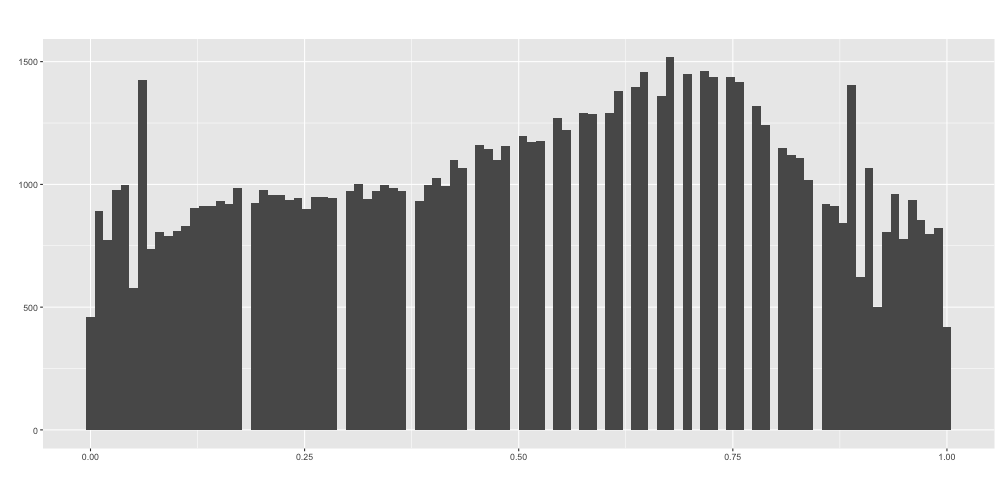

In [490]:
%%R -w 1000

ggplot(df) +
    aes(x=EPL_CANCER) +
    geom_histogram(bins=100) +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="", y="")


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2220 rows containing non-finite outside the scale range (`stat_bin()`). 



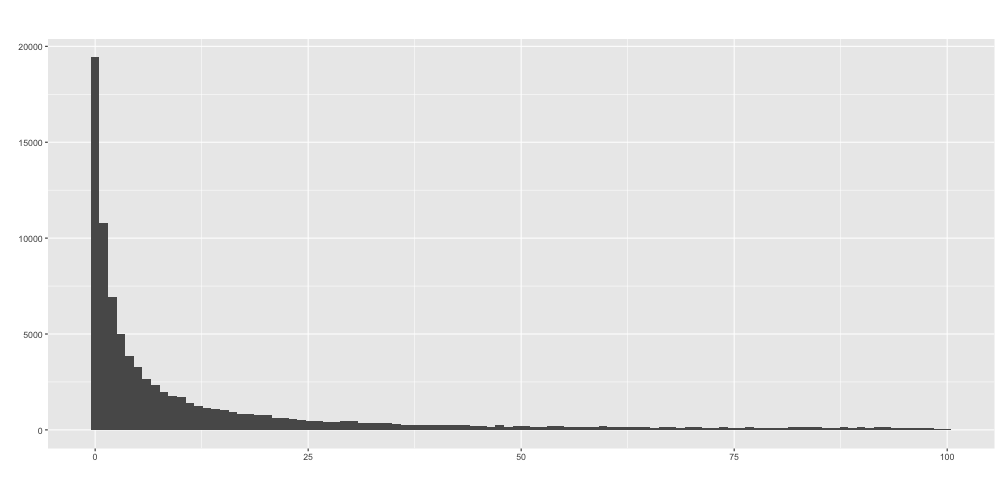

In [491]:
%%R -w 1000

ggplot(df) +
    aes(x=E_AFAM) +
    geom_histogram(bins=100) +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="", y="")


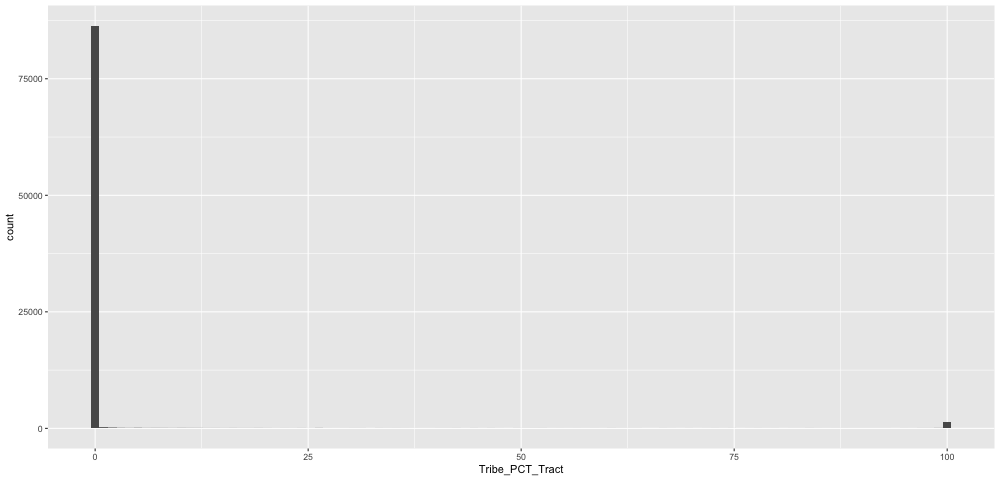

In [492]:
%%R -w 1000

ggplot(df) +
    aes(x=Tribe_PCT_Tract) +
    geom_histogram(bins=100) 

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2364 rows containing non-finite outside the scale range (`stat_bin()`). 



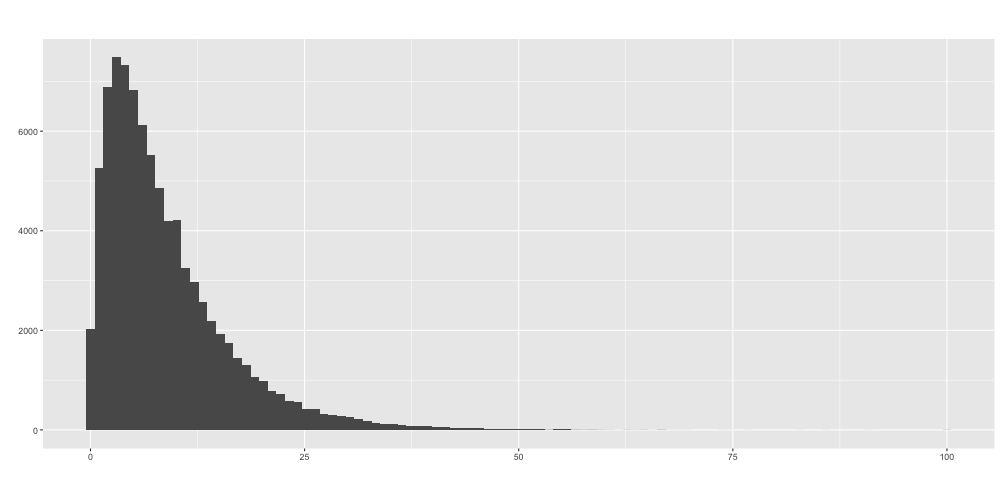

In [493]:
%%R -w 1000

ggplot(df) +
    aes(x=E_UNINSUR) +
    geom_histogram(bins=100) +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="", y="")        

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2364 rows containing non-finite outside the scale range (`stat_bin()`). 



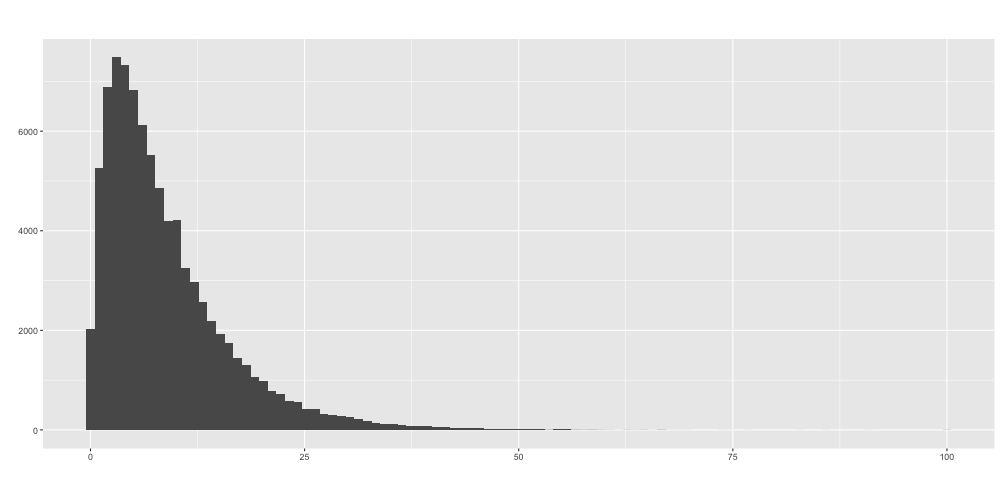

In [494]:
%%R -w 1000

ggplot(df) +
    aes(x=E_UNINSUR) +
    geom_histogram(bins=100) +
    labs(title=str_wrap("", width=75), 
         subtitle="", x="", y="")   

Error in `geom_histogram()`:
! Problem while computing stat.
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires a continuous x aesthetic.
✖ the x aesthetic is discrete.
ℹ Perhaps you want `stat="count"`?
Run `rlang::last_trace()` to see where the error occurred.


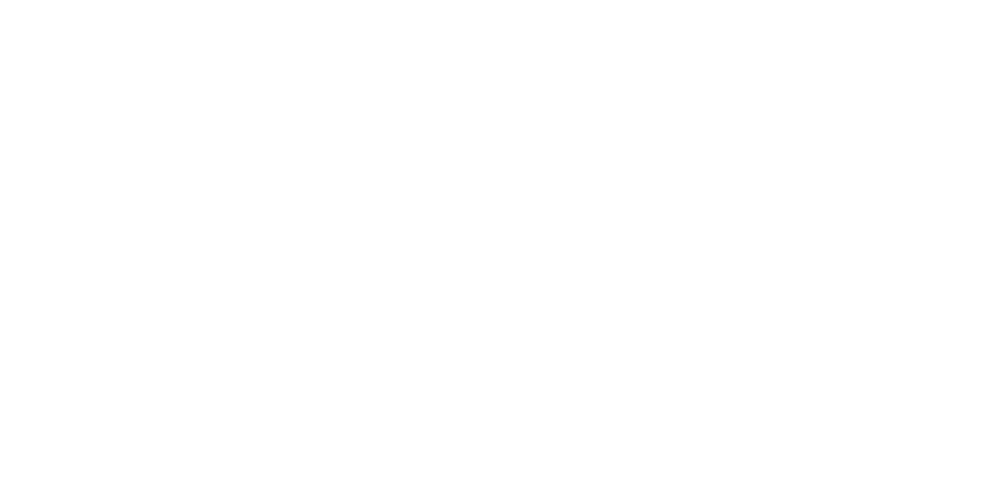

RRuntimeError: Error in geom_histogram(bins = 100) : 
ℹ Error occurred in the 1st layer.
Caused by error in `setup_params()`:
! `stat_bin()` requires a continuous x aesthetic.
✖ the x aesthetic is discrete.
ℹ Perhaps you want `stat="count"`?


In [495]:
%%R -w 1000

ggplot(df) +
    aes(x=withdrawal_volume_million_gallons) +
    geom_histogram(bins=100) +
    facet_wrap(~`Primary Technology`) + 
    labs(title=str_wrap("Coal and natural gas withdraw the most amount of water of all energy sources", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water withdrawal volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=withdrawal_volume_million_gallons) +
    geom_histogram(bins=30) +
    facet_wrap(~State) +
    labs(title=str_wrap("[NOT FOR PUB] Texas, Louisiana and Floria are some of the states that have higher-withdrawing natural gas power plants", width=75), 
         subtitle="Water usage by U.S. natural gas power plants according to the EIA", x="Water withdrawal volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=discharge_volume_million_gallons, y=1) +
    geom_jitter() +
    labs(title=str_wrap("[NOT FOR PUB] A sub-section of power plants discharge huge amounts of water", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water discharge volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=discharge_volume_million_gallons, y=1) +
    geom_jitter() +
    facet_wrap(~State) +
    labs(title=str_wrap("[NOT FOR PUB] A sub-section of power plants discharge huge amounts of water", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water discharge volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=consumption_volume_million_gallons, y=1) +
    geom_jitter() +
    labs(title=str_wrap("[NOT FOR PUB] Consumption volume follows a similar pattern, but the power plants are closer together here than in the withdrawal and discharge rates plots - and the outliers consume much less water than the outliers (in the other plots) withdraw or discharge", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water consumption volume (million gallons)", y="Number of power plants")


In [ ]:
%%R -w 1000

ggplot(df) +
    aes(x=consumption_volume_million_gallons, y=1) +
    geom_jitter() +
    facet_wrap(~State) +
    labs(title=str_wrap("[NOT FOR PUB] Florida, Louisiana and Georgia have some natural gas power plants that consume more water", width=75), 
         subtitle="Water usage by U.S. power plants according to the EIA", x="Water consumption volume (million gallons)", y="Number of power plants")


In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

I need to figure out how to merge in the water sources data appropriately before visualizing discrete variables

In [ ]:
# %%R -w 1000

# ggplot(df) +
#     aes(x = `Water Type`, y = 1) +
#     geom_jitter() +
#     labs(title=str_wrap("[NOT FOR PUB] Most water withdrawn by U.S. power plants is freshwater", width=75), 
#          subtitle="Water sources used by U.S. natural gas power plants according to the EIA", x="Water types", y="Number of power plants")


In [ ]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle